In [1]:
%matplotlib inline
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d import Axes3D

In [2]:
re_unemp = pd.read_csv('data/new_cali.csv')

re_unemp.head(5)

,Year,Period,employment,unemployment,unemployment rate,single_home_avg_prices,is_covid
0,2010,Jan,15997913,2216607,12.2,291655.4313,0
1,2010,Feb,16028580,2233503,12.2,291055.6660,0
2,2010,Mar,16061366,2242732,12.3,291133.4774,0
3,2010,Apr,16090440,2245213,12.2,291726.8098,0
4,2010,May,16112833,2240855,12.2,292800.8509,0


In [3]:
X = re_unemp[["employment", "unemployment", "is_covid"]]
y = re_unemp["single_home_avg_prices"].values.reshape(-1, 1)
print(X.shape, y.shape)

(125, 3) (125, 1)


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=84)


In [5]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [6]:
### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.8895632818486761
Testing Score: 0.9144340602524982


Text(0.5, 1.0, 'Residual Plot')

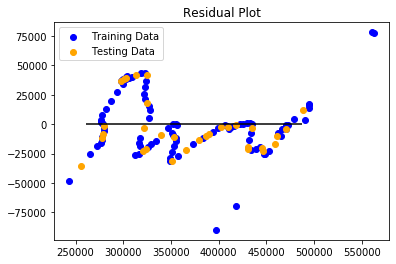

In [7]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")